

after setting the ID as row index (X_train):

       gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
ID                                                                      
0           0   40         155          60       81.3             1.2   
1           0   40         160          60       81.0             0.8   
2           1   55         170          60       80.0             0.8   
3           1   40         165          70       88.0             1.5   
4           0   40         155          60       86.0             1.0   
...       ...  ...         ...         ...        ...             ...   
55686       1   50         170          65       88.0             1.2   
55687       1   35         175          70       84.0             0.6   
55688       1   35         175          70       70.9             1.5   
55689       1   50         165          90      106.8             0.8   
55690       1   25         175          80       93.2             1.2   

  

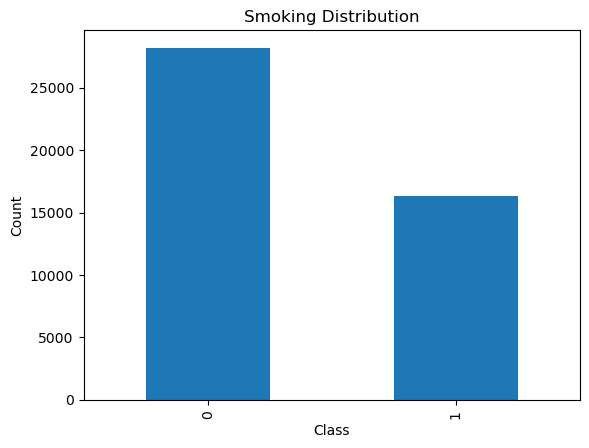



after joining the datasets: 

       gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
ID                                                                      
0           0   40         155          60       81.3             1.2   
1           0   40         160          60       81.0             0.8   
2           1   55         170          60       80.0             0.8   
3           1   40         165          70       88.0             1.5   
4           0   40         155          60       86.0             1.0   
...       ...  ...         ...         ...        ...             ...   
55686       1   50         170          65       88.0             1.2   
55687       1   35         175          70       84.0             0.6   
55688       1   35         175          70       70.9             1.5   
55689       1   50         165          90      106.8             0.8   
55690       1   25         175          80       93.2             1.2   

       eyesight(ri

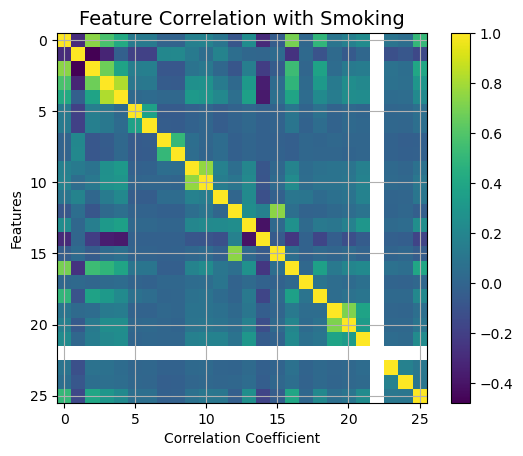



 Column having the constant value:

Index(['oral'], dtype='object')



 after dropping the 'oral' column: 

       gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
ID                                                                      
0           0   40         155          60       81.3             1.2   
1           0   40         160          60       81.0             0.8   
2           1   55         170          60       80.0             0.8   
3           1   40         165          70       88.0             1.5   
4           0   40         155          60       86.0             1.0   
...       ...  ...         ...         ...        ...             ...   
55686       1   50         170          65       88.0             1.2   
55687       1   35         175          70       84.0             0.6   
55688       1   35         175          70       70.9             1.5   
55689       1   50         165          90      106.8             0.8   
55690       1 

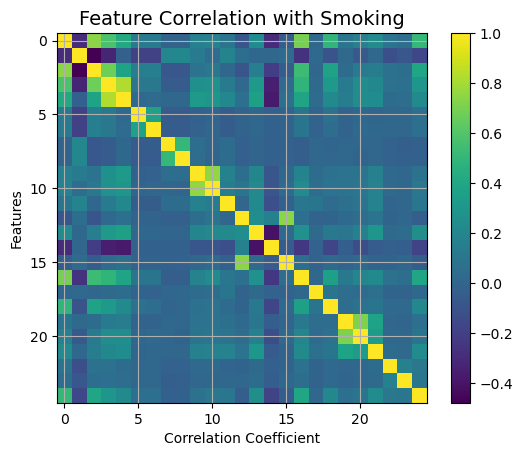


Running model: CART...
CART      : 0.6872 (0.0047) (run time: 2.39 sec)

Running model: NB...
NB        : 0.7029 (0.0028) (run time: 0.15 sec)

Running model: KNN...
KNN       : 0.7106 (0.0025) (run time: 4.71 sec)

Running model: RFC...
RFC       : 0.7553 (0.0042) (run time: 31.80 sec)

Model Ranking (Best to Worst):
1. RFC        - Accuracy: 0.7553 ± 0.0042 (Time: 31.80 sec)
2. KNN        - Accuracy: 0.7106 ± 0.0025 (Time: 4.71 sec)
3. NB         - Accuracy: 0.7029 ± 0.0028 (Time: 0.15 sec)
4. CART       - Accuracy: 0.6872 ± 0.0047 (Time: 2.39 sec)


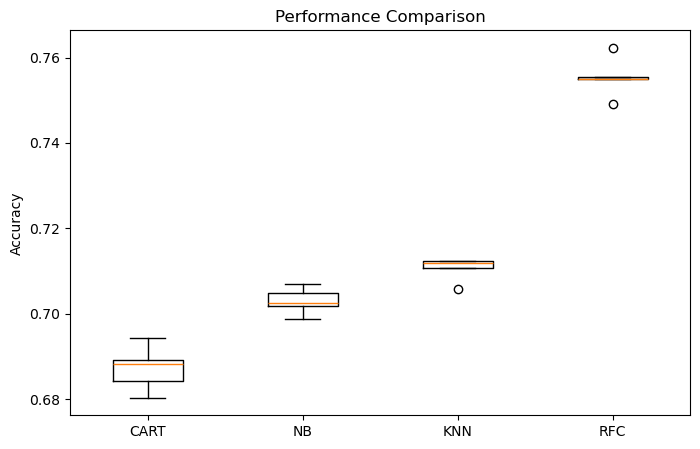

Test Accuracy: 1.0

Confusion Matrix:
 [[7036    0]
 [   0 4103]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7036
           1       1.00      1.00      1.00      4103

    accuracy                           1.00     11139
   macro avg       1.00      1.00      1.00     11139
weighted avg       1.00      1.00      1.00     11139



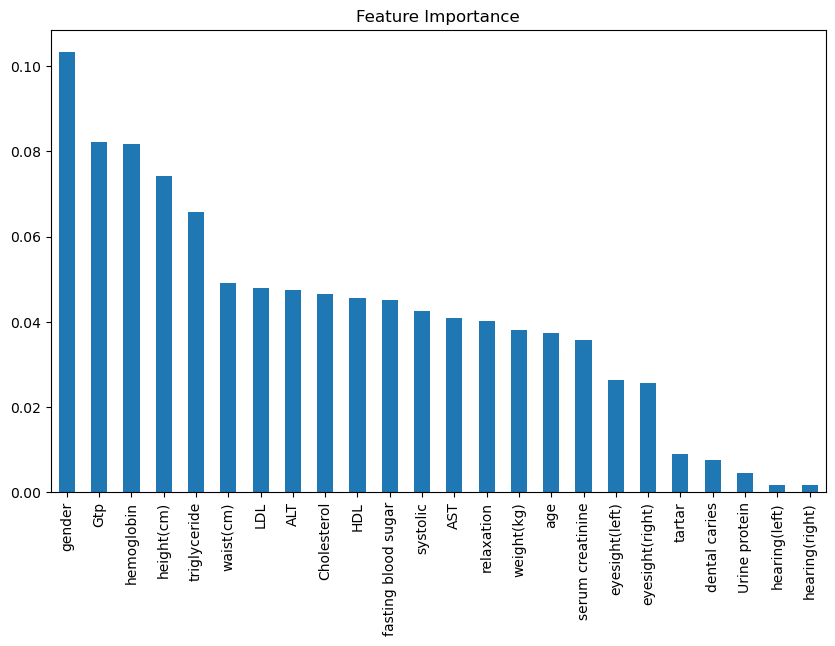




 pickle file saved successfully.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
import time

# importing the data
X_train = pd.read_csv("C:\\Users\\dell\\OneDrive\\Desktop\\EXTRAS\\UNGUIDED PROJECT IITK ML STP\\competition_format\\x_train.csv")
Y_train = pd.read_csv("C:\\Users\\dell\\OneDrive\\Desktop\\EXTRAS\\UNGUIDED PROJECT IITK ML STP\\competition_format\\y_train.csv")
X_test = pd.read_csv("C:\\Users\\dell\\OneDrive\\Desktop\\EXTRAS\\UNGUIDED PROJECT IITK ML STP\\competition_format\\x_test.csv")
Y_test = pd.read_csv("C:\\Users\\dell\\OneDrive\\Desktop\\EXTRAS\\UNGUIDED PROJECT IITK ML STP\\competition_format\\y_test.csv")

# print("\n\n X-training data: \n")
# print(X_train)
# print("\n\n Y-training data: \n")
# print(Y_train)

# pre-processing and visualisating the data

df1 = pd.DataFrame(X_train)
df2 = pd.DataFrame(Y_train)
# filtering the non numeric data columns and mapping them to 0 and 1.
non_numeric_df = df1.select_dtypes(exclude=np.number)
# print(non_numeric_df)
df1['gender'] = df1['gender'].map({'M': 1, 'F': 0})
df1['oral'] = df1['oral'].map({'Y': 1, 'N': 0})
df1['tartar'] = df1['tartar'].map({'Y': 1, 'N': 0})

# print("\n\n after mapping: \n")
# print(df1)
# print("\n\nshape of the training data: \n")
# print(df1.shape)

# setting ID as the row index 
df1 = df1.set_index('ID')
print("\n\nafter setting the ID as row index (X_train):\n")
print(df1)

# print("\n\n Y training data \n")
# print(df2)

# setting ID as the row index 
df2 = df2.set_index('ID')
print("\n\nafter setting the ID as row index (Y_train):\n")
print(df2)

# distribution of smokers and non smokers
df2['smoking'].value_counts().plot(kind='bar')
plt.title("Smoking Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

#  merging the df1 and df2
df = df1.join(df2)
print("\n\nafter joining the datasets: \n")
print(df)

# Compute correlations with smoking
# corr_values = df.corr()['smoking'].drop('smoking').sort_values()

# Create figure
fig = plt.figure()
ax1 = fig.add_subplot(111)
cax = ax1.imshow(df.corr(), interpolation="none")
fig.colorbar(cax)
# Title & labels
plt.title('Feature Correlation with Smoking', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(True)

plt.show()

# Columns where number of unique values == 1
constant_cols = df.columns[df.nunique() == 1]

print("\n\n Column having the constant value:\n")
print(constant_cols)

# dropping the oral column
df = df.drop(columns=['oral'])
df1 = df1.drop(columns=['oral'])
print("\n\n\n after dropping the 'oral' column: \n")
print(df)

# colormap after dropping the oral column

fig = plt.figure()
ax1 = fig.add_subplot(111)
cax = ax1.imshow(df.corr(), interpolation="none")
fig.colorbar(cax)

# Title & labels

plt.title('Feature Correlation with Smoking', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(True)
plt.show()

# training and testing

X = df1
y = df2.values.ravel()

# Models to test (SVM removed)
models_list = [
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('KNN', Pipeline([('scaler', StandardScaler()), 
                      ('knn', KNeighborsClassifier())])),
    ('RFC', RandomForestClassifier(random_state=123))
]

num_folds = 5
names = []
results = []
scores_summary = []

# Loop through models
for name, model in models_list:
    print(f"\nRunning model: {name}...")
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=123)
    
    start_time = time.time()
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    end_time = time.time()
    
    results.append(cv_results)
    names.append(name)
    scores_summary.append((name, cv_results.mean(), cv_results.std(), end_time - start_time))
    
    print(f"{name:<10}: {cv_results.mean():.4f} ({cv_results.std():.4f}) "
          f"(run time: {end_time - start_time:.2f} sec)")

# Ranking by mean accuracy
scores_summary.sort(key=lambda x: x[1], reverse=True)
print("\nModel Ranking (Best to Worst):")
for rank, (name, mean, std, runtime) in enumerate(scores_summary, start=1):
    print(f"{rank}. {name:<10} - Accuracy: {mean:.4f} ± {std:.4f} (Time: {runtime:.2f} sec)")

# Plot results
plt.figure(figsize=(8, 5))
plt.boxplot(results)
plt.xticks(range(1, len(names)+1), names)
plt.ylabel("Accuracy")
plt.title("Performance Comparison")
plt.show()

# Prepare train & test sets


X_train_full = df1
y_train_full = df2['smoking']  # make sure it's a 1D array
X_test_full = X_test.set_index('ID')
X_test_full['gender'] = X_test_full['gender'].map({'M': 1, 'F': 0})
X_test_full['oral'] = X_test_full['oral'].map({'Y': 1, 'N': 0})
X_test_full['tartar'] = X_test_full['tartar'].map({'Y': 1, 'N': 0})
X_test_full = X_test_full.drop(columns=['oral'])  # since it was constant in train

y_test_full = Y_test.set_index('ID')['smoking']

# Train Random Forest
rfc = RandomForestClassifier(random_state=123)
rfc.fit(X_train_full, y_train_full)

# Predictions
y_pred = rfc.predict(X_test_full)

# Evaluation
print("Test Accuracy:", accuracy_score(y_test_full, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_full, y_pred))
print("\nClassification Report:\n", classification_report(y_test_full, y_pred))

# Feature importance
importances = pd.Series(rfc.feature_importances_, index=X_train_full.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.title("Feature Importance")
plt.show()


import pickle
filename = "C:\\Users\\dell\\OneDrive\\Desktop\\EXTRAS\\UNGUIDED PROJECT IITK ML STP\\Mitull_Goel_Final_smokers_project.sav"
pickle.dump(rfc,open(filename,"wb"))

print("\n\n\n pickle file saved successfully.\n")